In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import os
%matplotlib inline
from sklearn import linear_model

In [2]:
# Load CSV file (01/22/2020 - 7/27/2020) sorted per highest TotalCases
world_data_df1 = pd.read_csv("/Users/hemantkiri/Desktop/Covid19/Resources/worldometer_data.csv")
world_data_df1

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


## Population vs TotalCases

In [3]:
# Select columns to explore
world_data_df1 = world_data_df1[["Population", "TotalCases"]]

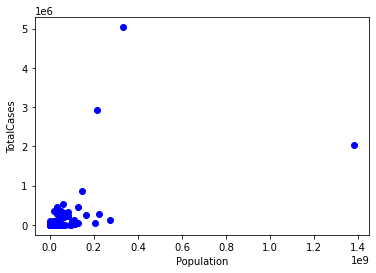

In [4]:
# Population vs TotalCases
plt.scatter(world_data_df1["Population"],world_data_df1["TotalCases"], color="blue")
plt.xlabel("Population")
plt.ylabel("TotalCases")
plt.show()

In [5]:
# Generate train and test from our data
train = world_data_df1[:(int((len(world_data_df1)*0.2)))]
test = world_data_df1[(int((len(world_data_df1)*0.2))):]

In [6]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["Population"]])
train_y = np.array(train[["TotalCases"]])

regr.fit(train_x,train_y)

print("coefficients : ",regr.coef_)
print("Intercept : ", regr.intercept_)

coefficients :  [[0.00203352]]
Intercept :  [230779.13713068]


Text(0, 0.5, 'TotalCases')

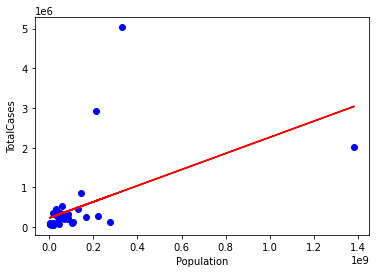

In [7]:
# Plotting regrassion line
plt.scatter(train["Population"], train ["TotalCases"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("TotalCases")

In [8]:
# Prediction value
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [9]:
# Predicting higher population for estimated total cases
my_predict_country_population = 1500000000
estimated_totalcases = get_regression_predictions(my_predict_country_population,
                        regr.intercept_[0],regr.coef_[0][0])
print("Estimated Totalcases :" ,estimated_totalcases)

Estimated Totalcases : 3281060.603130871


## Population vs DeathsCases

In [11]:
# Load CSV file (01/22/2020 - 7/27/2020)
world_data_df1 = pd.read_csv("/Users/hemantkiri/Desktop/Covid19/Resources/worldometer_data.csv")
world_data_df1

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,Montserrat,North America,4.992000e+03,13,NaN,1.0,NaN,10.0,NaN,2.0,NaN,2604.0,200.0,61.0,12220.0,NaN
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN
207,Vatican City,Europe,8.010000e+02,12,NaN,NaN,NaN,12.0,NaN,0.0,NaN,14981.0,NaN,NaN,NaN,Europe


In [12]:
# Select columns to explore
world_data_df1 = world_data_df1[["Population", "TotalDeaths"]]

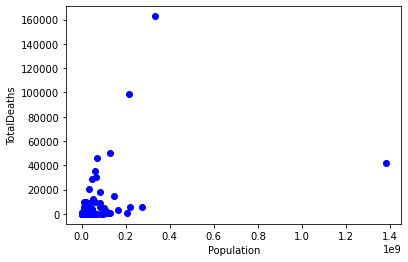

In [13]:
# Population vs DeathsCases
plt.scatter(world_data_df1["Population"],world_data_df1["TotalDeaths"], color="blue")
plt.xlabel("Population")
plt.ylabel("TotalDeaths")
plt.show()

In [14]:
# Generate train and test from our data
train = world_data_df1[:(int((len(world_data_df1)*0.2)))]
test = world_data_df1[(int((len(world_data_df1)*0.2))):]

In [15]:
# Modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[["Population"]])
train_y = np.array(train[["TotalDeaths"]])

regr.fit(train_x,train_y)

print("coefficients : ",regr.coef_)
print("Intercept : ", regr.intercept_)

coefficients :  [[4.80758065e-05]]
Intercept :  [11761.42162164]


Text(0, 0.5, 'TotalDeaths')

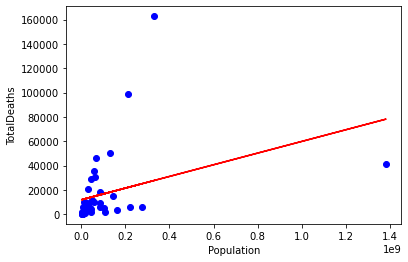

In [16]:
# Plotting regrassion line
plt.scatter(train["Population"], train ["TotalDeaths"], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel("Population")
plt.ylabel("TotalDeaths")

In [17]:
# Prediction value
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope + intercept
    return predicted_values

In [18]:
# Predicting higher population for estimated total deaths
my_predict_country_population = 1500000000
estimated_deathscases = get_regression_predictions(my_predict_country_population,
                        regr.intercept_[0],regr.coef_[0][0])
print("Estimated Deathscases :" ,estimated_deathscases)

Estimated Deathscases : 83875.13136157556
